# Unsupervised Learning - K-Means Clustering

In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

In [6]:
os.getcwd()

'C:\\Users\\think\\OneDrive - Thinking Mojo\\TSLC\\Intellipaat\\Session Master\\06.Data Science Weekday Batch - 11Oct'

In [7]:
df_cust = pd.read_csv('Mall_Customers.csv')

In [8]:
df_cust

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
from sklearn.cluster import KMeans

### Basic clustering on Age & Spending - 2D

In [10]:
df_cust.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [11]:
sel_cols = ['Age',  'Spending Score (1-100)']

In [12]:
df_cust[sel_cols]

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


### Let us plot a scatter plot

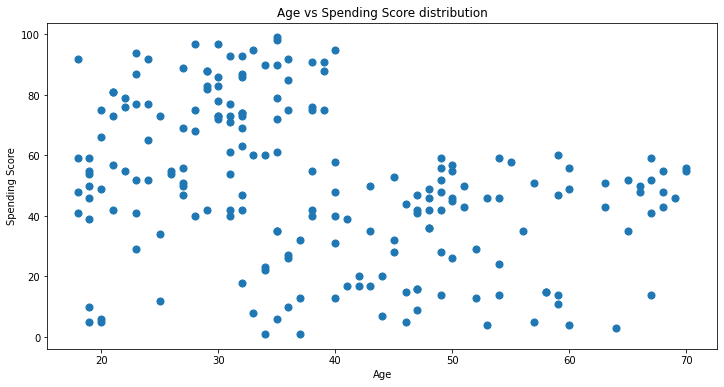

In [21]:
plt.subplots(figsize=(12,6))

plt.scatter(x='Age', y='Spending Score (1-100)', data=df_cust, s=50)
plt.title('Age vs Spending Score distribution')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

### Decide the K-Value
`elbow chart`

- To decide the k-value, we use `elbow chart technique` to determine the optimal number of clusters in K-Means clustering
- It plots cost function produced by different k values
- As k increases, `average distortion/variance will decrease`

In [22]:
elbow = df_cust[['Age', 'Spending Score (1-100)']].iloc[:,:].values #to get the 2-D array

In [23]:
elbow

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [24]:
inertia = []

In [26]:
for n in range(1,11):
    algo = KMeans(n_clusters=n, init='k-means++', n_init=11, max_iter=300, tol=.00001, random_state=45, algorithm='elkan')
    algo.fit(elbow)
    inertia.append(algo.inertia_)

C:\Users\think\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:827: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.

C:\Users\think\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [31]:
inertia

[171535.50000000003,
 75949.15601023012,
 45840.67661610871,
 28165.583566629342,
 23818.41168818787,
 19644.255043202407,
 15514.193134351033,
 13055.626865965582,
 11441.98824268596,
 10115.55182132954]

In [30]:
len(inertia)

10

### Plot the elbow chart

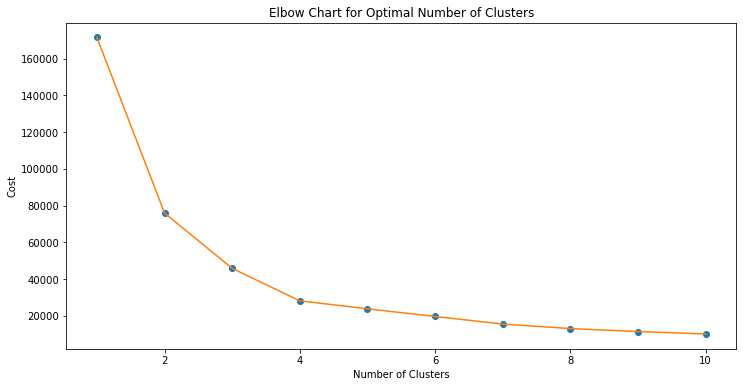

In [35]:
plt.subplots(figsize=(12,6))

plt.plot(np.arange(1,11), inertia, 'o') #align with number of cluster
plt.plot(np.arange(1,11), inertia, '-')
plt.title('Elbow Chart for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.show()

### Let us start with K=3

In [36]:
algo_3 = (KMeans(n_clusters=3, init='k-means++', n_init=3, max_iter=300, tol=.00001, random_state=45, algorithm='elkan'))


In [38]:
algo_3.fit(elbow)

KMeans(algorithm='elkan', n_clusters=3, n_init=3, random_state=45, tol=1e-05)

In [40]:
labels1 = algo_3.labels_

In [42]:
centroids1 = algo_3.cluster_centers_

In [43]:
labels1

array([1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2,
       0, 2, 0, 2, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 1,
       0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [44]:
centroids1

array([[42.95744681, 14.59574468],
       [43.05494505, 47.78021978],
       [29.56451613, 80.74193548]])

### Plot the clusters

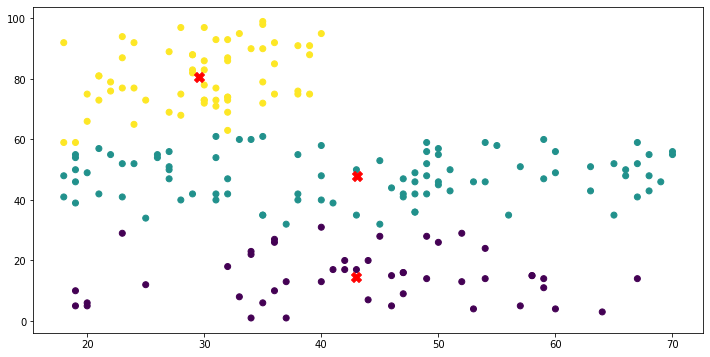

In [45]:
plt.subplots(figsize=(12,6))
plt.scatter(elbow[:,0], elbow[:,1], c=labels1, cmap='viridis')
plt.scatter(centroids1[:,0], centroids1[:,1], marker='X',color='red', s=100 )
plt.show()

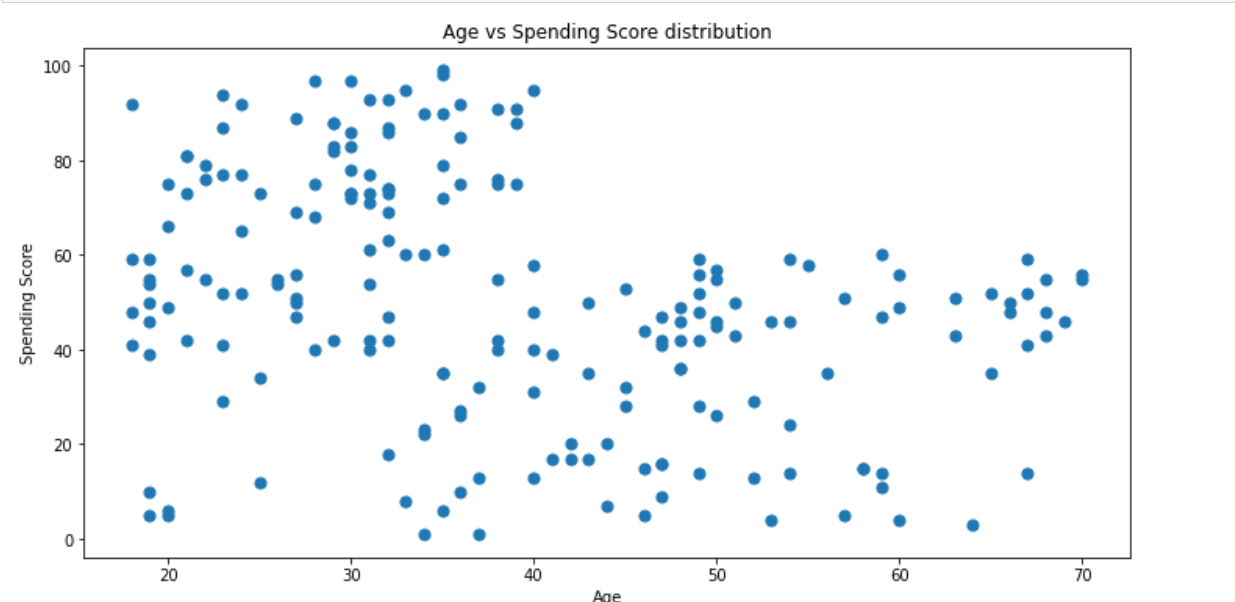

### Let us start with K=4

In [48]:
algo_4 = (KMeans(n_clusters=4, init='k-means++', n_init=4, max_iter=300, tol=.00001, random_state=45, algorithm='elkan'))

In [49]:
algo_4.fit(elbow)

KMeans(algorithm='elkan', n_clusters=4, n_init=4, random_state=45, tol=1e-05)

In [50]:
labels2 = algo_4.labels_

In [51]:
centroids2 = algo_4.cluster_centers_

In [52]:
labels2

array([3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 3, 0, 2, 3, 2,
       0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 3,
       0, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3,
       3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 2, 3, 2, 1, 2, 0, 2, 0, 2,
       3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [53]:
centroids2

array([[43.29166667, 15.02083333],
       [55.70833333, 48.22916667],
       [30.1754386 , 82.35087719],
       [27.61702128, 49.14893617]])

### Plot the clusters

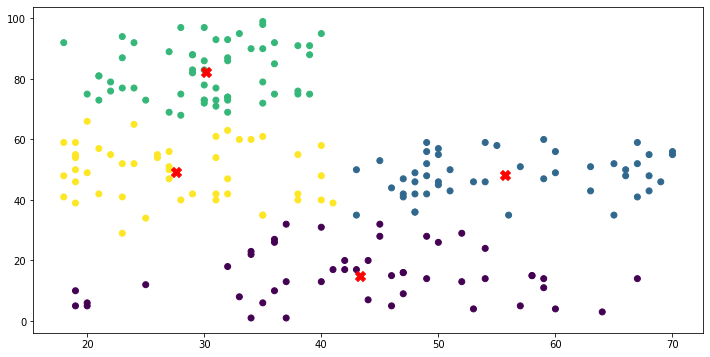

In [54]:
plt.subplots(figsize=(12,6))
plt.scatter(elbow[:,0], elbow[:,1], c=labels2, cmap='viridis')
plt.scatter(centroids2[:,0], centroids2[:,1], marker='X',color='red', s=100 )
plt.show()

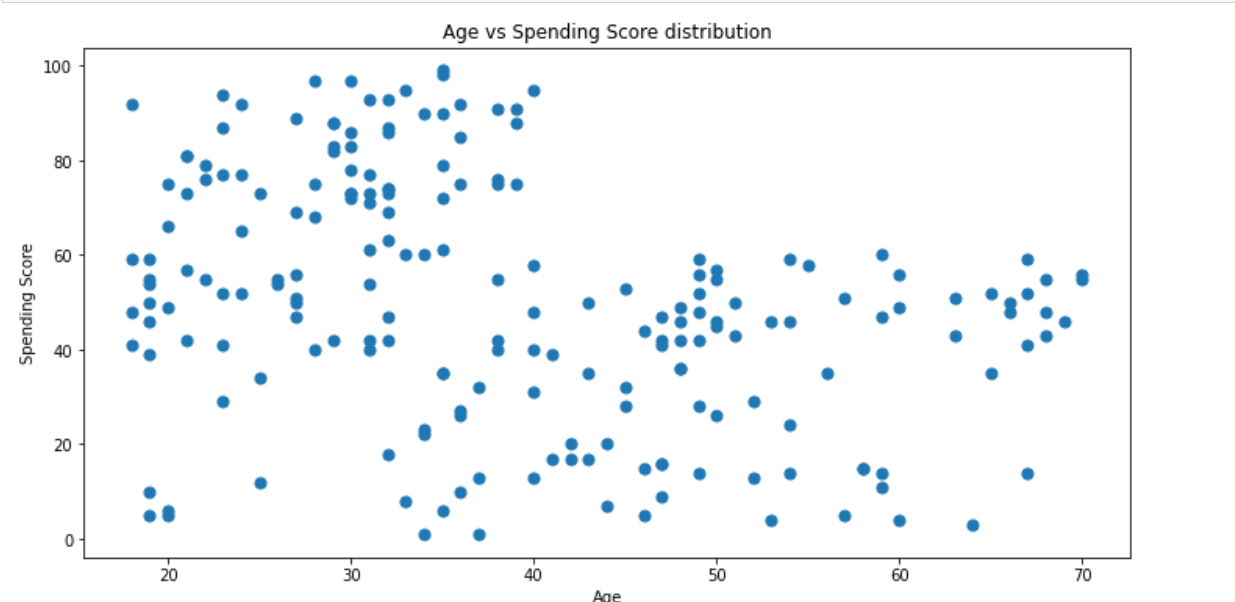

In [55]:
elbow

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [59]:
df_labels_4 = pd.DataFrame(labels2, columns=['Clusters'])

In [60]:
df_labels_4

,Clusters
0,3
1,2
2,0
3,2
4,3
...,...
195,2
196,0
197,2
198,0


In [62]:
df_cust_with_clusters = pd.concat([df_cust, df_labels_4],axis=1)

In [63]:
df_cust_with_clusters

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,3
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [64]:
os.getcwd()

'C:\\Users\\think\\OneDrive - Thinking Mojo\\TSLC\\Intellipaat\\Session Master\\06.Data Science Weekday Batch - 11Oct'